<a href="https://colab.research.google.com/github/Kzis/mrt-is/blob/master/MRT_IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# 4/zgGqjYp9xNvXVakfFyzEZb05Qfsnz3F0e8iJaTsk_-1OlH011Jo2ubk

In [46]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
# df = pd.read_csv("gdrive/My Drive/NIDA/transection_.csv" , nrows=10000)
df = pd.read_csv("gdrive/My Drive/NIDA/transection_.csv")

In [49]:
df.shape

(17240769, 24)

In [50]:
df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
0,40,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
1,69,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
2,127,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
3,129,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
4,333,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017


In [51]:
df.columns

Index(['TransactionID', 'TransactionDate', 'CardType', 'BusinessDay',
       'EntryStationID', 'ExitStationID', 'TicketType', 'TicketName',
       'PassengerType', 'StationName', 'LineCode', 'Right_StationName',
       'Right_LineCode', 'DateKey', 'DayType', 'DayNumberOfMonth',
       'EnglishDayNameOfWeek', 'ThaiDayNameOfWeek', 'EnglishMonthName',
       'ThaiMonthName', 'MonthNumberOfYear', 'CalendarQuater',
       'CalendarSemester', 'CalendarYear'],
      dtype='object')

In [52]:
df.CardType.value_counts()

1     8945627
58    5811954
4     1296077
3      520535
21     381360
60     161925
24      52314
59      28807
23      22109
2       19229
22        832
Name: CardType, dtype: int64

In [53]:
df.TicketType.value_counts()

Card     11238083
Token     6002686
Name: TicketType, dtype: int64

In [54]:
df.TicketName.value_counts()

Adult-A      8945627
Adult        5811954
Student-A    1296077
Senior-A      520535
Adult-B       381360
Senior        161925
Student-B      52314
Child          28807
Senior-B       22109
Child-A        19229
Child-B          832
Name: TicketName, dtype: int64

In [55]:
df.PassengerType.value_counts()

Adult      15138941
Student     1348391
Senior       704569
Child         48868
Name: PassengerType, dtype: int64

In [56]:
df.StationName.value_counts()

Sukhumvit                                   2247742
Phra Ram 9                                  1519359
Phetchaburi                                 1387354
Chatuchak Park                              1220946
Si Lom                                      1164985
Thailand Cultural Centre                    1129021
Huai Khwang                                 1127254
Phahon Yothin                                930277
Lat Phrao                                    921350
Hua Lamphong                                 822199
Sutthisan                                    821244
Queen Sirikit National Convention Centre     759837
Bang Sue                                     655375
Lumphini                                     589214
Sam Yan                                      583121
Ratchadaphisek                               420421
Kamphaeng Phet                               247994
Khlong Toei                                  141782
Tao Poon                                     114038
Khlong Bang 

In [57]:
df.CalendarYear.value_counts()

2017    17240769
Name: CalendarYear, dtype: int64

In [58]:
df.ThaiMonthName.value_counts()

พฤศจิกายน     1801585
กันยายน       1775869
สิงหาคม       1754984
ตุลาคม        1676494
ธันวาคม       1630557
มิถุนายน      1627196
กรกฎาคม       1606519
พฤษภาคม       1520761
เมษายน        1242435
มีนาคม         948261
มกราคม         829946
กุมภาพันธ์     826162
Name: ThaiMonthName, dtype: int64

In [59]:
jan_df = df.loc[df['ThaiMonthName'] == 'มกราคม']
jan_df.head()

,TransactionID,TransactionDate,CardType,BusinessDay,EntryStationID,ExitStationID,TicketType,TicketName,PassengerType,StationName,LineCode,Right_StationName,Right_LineCode,DateKey,DayType,DayNumberOfMonth,EnglishDayNameOfWeek,ThaiDayNameOfWeek,EnglishMonthName,ThaiMonthName,MonthNumberOfYear,CalendarQuater,CalendarSemester,CalendarYear
0,40,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
1,69,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
2,127,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
3,129,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017
4,333,2017-01-01,1,2017-01-01,22,21,Card,Adult-A,Adult,Sam Yan,BL,Hua Lamphong,BL,20170101,WE,1,Sunday,อาทิตย์,January,มกราคม,1,1,1,2017


In [72]:
df_jan_transaction_date_sum = jan_df.TransactionDate.value_counts().rename_axis('date').reset_index(name='counts')
df_jan_transaction_date_sum.sort_values('date')
print(df_jan_transaction_date_sum)

          date  counts
0   2017-01-25   37135
1   2017-01-26   36485
2   2017-01-13   36171
3   2017-01-24   36050
4   2017-01-20   35898
5   2017-01-11   35831
6   2017-01-18   35575
7   2017-01-10   35343
8   2017-01-31   35253
9   2017-01-19   35208
10  2017-01-17   35107
11  2017-01-09   34666
12  2017-01-23   34660
13  2017-01-06   33946
14  2017-01-27   33717
15  2017-01-16   33200
16  2017-01-05   33129
17  2017-01-30   32814
18  2017-01-12   31840
19  2017-01-04   31479
20  2017-01-28   16397
21  2017-01-21   16184
22  2017-01-14   16018
23  2017-01-07   15156
24  2017-01-29   13026
25  2017-01-03   12134
26  2017-01-22   12071
27  2017-01-15   12068
28  2017-01-08   11123
29  2017-01-02    7217
30  2017-01-01    5045


In [115]:
station_sum = 0
station_list = jan_df['StationName'].unique().tolist()
# station_list = ["Sam Yan","Ratchadaphisek"]
jan_date_list = df_jan_transaction_date_sum['date'].tolist()
output_list = []
new_list = []
total = 0
for station in station_list:
  station_sum = 0
  output_list = []
  for date in jan_date_list:
    subset_df = jan_df[ (jan_df["StationName"]==station) & (jan_df["TransactionDate"]==date) ].count()
    column_count = subset_df.value_counts()
    station_sum = station_sum + column_count.index[0]
    output_list.append(column_count.index[0]) 
    # print("{} : {} : {}".format(station,date,column_count.index[0]) )
  new_list.append(output_list)
  total = total +station_sum
  print("{} total : {}".format(station,station_sum))
print("Total : ", total)
print(new_list)

Sam Yan total : 27535
Si Lom total : 56352
Lumphini total : 29646
Khlong Toei total : 6491
Queen Sirikit National Convention Centre total : 29240
Sukhumvit total : 111928
Phetchaburi total : 72151
Phra Ram 9 total : 79336
Thailand Cultural Centre total : 57071
Huai Khwang total : 58844
Sutthisan total : 45883
Ratchadaphisek total : 22266
Lat Phrao total : 43903
Phahon Yothin total : 40775
Chatuchak Park total : 57959
Kamphaeng Phet total : 8437
Bang Sue total : 49282
Hua Lamphong total : 32847
Total :  829946
[[1328, 1309, 1190, 1207, 999, 1209, 986, 1165, 1241, 1014, 1006, 1215, 1207, 1158, 1110, 967, 1188, 1244, 990, 1156, 566, 551, 538, 509, 475, 337, 472, 398, 341, 250, 209], [2865, 2790, 2460, 2452, 2439, 2451, 2424, 2513, 2384, 2406, 2407, 2394, 2371, 2285, 2569, 2246, 2306, 2247, 2283, 2236, 1469, 853, 763, 745, 1100, 660, 557, 576, 554, 332, 215], [1448, 1404, 1345, 1426, 1295, 1374, 1369, 1358, 1372, 1378, 1391, 1299, 1327, 1259, 1298, 1243, 1311, 1209, 1314, 1144, 497, 303, 3

In [116]:
df_test = pd.DataFrame(new_list)
df_test.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1328,1309,1190,1207,999,1209,986,1165,1241,1014,1006,1215,1207,1158,1110,967,1188,1244,990,1156,566,551,538,509,475,337,472,398,341,250,209
1,2865,2790,2460,2452,2439,2451,2424,2513,2384,2406,2407,2394,2371,2285,2569,2246,2306,2247,2283,2236,1469,853,763,745,1100,660,557,576,554,332,215
2,1448,1404,1345,1426,1295,1374,1369,1358,1372,1378,1391,1299,1327,1259,1298,1243,1311,1209,1314,1144,497,303,324,322,357,307,271,254,224,135,88
3,308,291,304,308,302,313,294,296,322,296,273,252,308,294,301,259,249,299,245,231,112,87,88,82,67,64,61,71,55,37,22
4,1400,1404,1334,1377,1332,1336,1328,1319,1345,1411,1374,1310,1324,1290,1169,1223,1289,1188,1235,1301,352,386,332,359,274,302,271,231,209,136,99


In [117]:
df_x = df_test.T

In [118]:
df_x.columns = station_list

In [119]:
df_x

,Sam Yan,Si Lom,Lumphini,Khlong Toei,Queen Sirikit National Convention Centre,Sukhumvit,Phetchaburi,Phra Ram 9,Thailand Cultural Centre,Huai Khwang,Sutthisan,Ratchadaphisek,Lat Phrao,Phahon Yothin,Chatuchak Park,Kamphaeng Phet,Bang Sue,Hua Lamphong
0,1328,2865,1448,308,1400,4833,3512,3469,2527,2497,1991,986,1866,1617,2530,225,2310,1423
1,1309,2790,1404,291,1404,4760,3356,3249,2566,2447,2058,1000,1908,1705,2450,227,2214,1347
2,1190,2460,1345,304,1334,4824,3268,3393,2631,2453,1991,1000,1908,1661,2558,306,2166,1379
3,1207,2452,1426,308,1377,4779,3424,3294,2455,2390,2033,971,1990,1609,2491,252,2241,1351
4,999,2439,1295,302,1332,4709,3432,3449,2627,2419,2073,997,1843,1733,2527,272,2126,1324
5,1209,2451,1374,313,1336,4798,3395,3324,2553,2427,1965,996,1956,1592,2346,242,2197,1357
6,986,2424,1369,294,1328,4837,3425,3306,2432,2531,2026,968,1803,1653,2366,243,2231,1353
7,1165,2513,1358,296,1319,4706,3309,3318,2371,2335,1978,951,1994,1622,2385,222,2212,1289
8,1241,2384,1372,322,1345,4891,3344,3178,2343,2367,1968,968,1841,1585,2419,223,2080,1382
9,1014,2406,1378,296,1411,4663,3336,3291,2585,2420,1965,927,1820,1600,2340,218,2156,1382


In [124]:
dff = df_jan_transaction_date_sum.join(df_x)

In [125]:
dff.head()

,date,counts,Sam Yan,Si Lom,Lumphini,Khlong Toei,Queen Sirikit National Convention Centre,Sukhumvit,Phetchaburi,Phra Ram 9,Thailand Cultural Centre,Huai Khwang,Sutthisan,Ratchadaphisek,Lat Phrao,Phahon Yothin,Chatuchak Park,Kamphaeng Phet,Bang Sue,Hua Lamphong
0,2017-01-25,37135,1328,2865,1448,308,1400,4833,3512,3469,2527,2497,1991,986,1866,1617,2530,225,2310,1423
1,2017-01-26,36485,1309,2790,1404,291,1404,4760,3356,3249,2566,2447,2058,1000,1908,1705,2450,227,2214,1347
2,2017-01-13,36171,1190,2460,1345,304,1334,4824,3268,3393,2631,2453,1991,1000,1908,1661,2558,306,2166,1379
3,2017-01-24,36050,1207,2452,1426,308,1377,4779,3424,3294,2455,2390,2033,971,1990,1609,2491,252,2241,1351
4,2017-01-20,35898,999,2439,1295,302,1332,4709,3432,3449,2627,2419,2073,997,1843,1733,2527,272,2126,1324


In [127]:
dff.to_excel (r'Jan_Summary.xlsx', index = False, header=True)

In [90]:
jan_df.StationName.value_counts()

Sukhumvit                                   111928
Phra Ram 9                                   79336
Phetchaburi                                  72151
Huai Khwang                                  58844
Chatuchak Park                               57959
Thailand Cultural Centre                     57071
Si Lom                                       56352
Bang Sue                                     49282
Sutthisan                                    45883
Lat Phrao                                    43903
Phahon Yothin                                40775
Hua Lamphong                                 32847
Lumphini                                     29646
Queen Sirikit National Convention Centre     29240
Sam Yan                                      27535
Ratchadaphisek                               22266
Kamphaeng Phet                                8437
Khlong Toei                                   6491
Name: StationName, dtype: int64

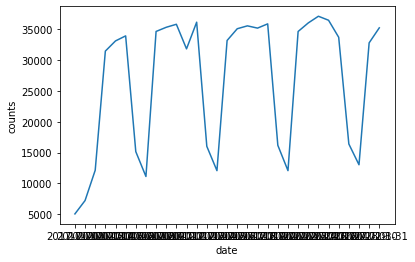

In [76]:
sns.lineplot(x = "date", y = "counts", data=df_jan_transaction_date_sum)
plt.show()